Although kNN is a supervised ML algorithm, when it comes to anomaly detection it takes an unsupervised approach. This is because there is no actual “learning” involved in the process and there is no pre-determined labeling of “outlier” or “not-outlier” in the dataset, instead, it is entirely based upon threshold values. Data scientists arbitrarily decide the cutoff values beyond which all observations are called anomalies (as we will see later). That is also why there is no train-test-split of data or an accuracy report.


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [4]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# input data
df = data[["sepal_length", "sepal_width"]]

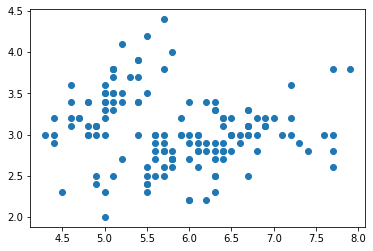

In [5]:
# scatterplot of inputs data
plt.scatter(df["sepal_length"], df["sepal_width"])

In [6]:
# create arrays
X = df.values


In [7]:
print(X[0:5,])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [8]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

**Anomaly detection**
Now that we have fitted the model, it’s time to extract model outputs—(a) distances between data points and (b) associated index values — that can be used for detecting anomalies.

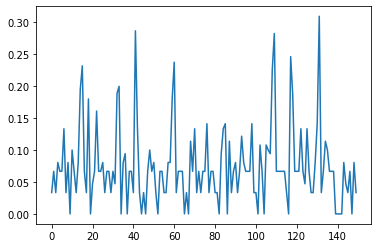

In [9]:
# distances and indexes of k-neighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

As we can see, there are some spikes in distance measures, and these spikes are potentially anomalies or outliers in the dataset.

Now comes one of the most important decisions for data scientists — determining the cutoff value to filter anomalies.

As we see in the figure above, some cutoff possibilities are — 0.25, 0.20, 0.15 (y-axis), each filtering a progressively higher number of outliers.

For this demo, let’s be generous and choose 0.15 as the cutoff to get more outliers. The reason for being generous is to be able to further examine the data so we are not missing outlier.


In [15]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.20)
outlier_index

(array([ 15,  41,  60, 108, 109, 117, 131]),)

In [16]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
15,5.7,4.4
41,4.5,2.3
60,5.0,2.0
108,6.7,2.5
109,7.2,3.6
117,7.7,3.8
131,7.9,3.8


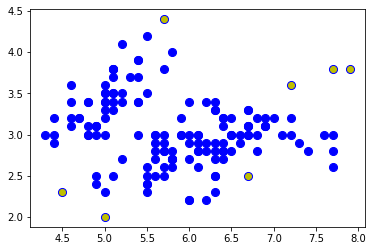

In [17]:
# plot data
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "y")